In [9]:
using MPSTime
using Random
using Plots
using PrettyTables

rng = Xoshiro(1)

opts = MPSOptions(d = 2, chi_max = 10, sigmoid_transform = false)

ntimepoints = 10
ntrain_instances = 500
ntest_instances = 200

sigma = 0.1;

In [10]:
X_train, _ = trendy_sine(ntimepoints, ntrain_instances; sigma = sigma, rng = rng,slope = 0);
X_test, _ = trendy_sine(ntimepoints, ntest_instances; sigma = sigma, rng = rng,slope = 0);
Final, _ = trendy_sine(100, 1; sigma = sigma, rng = rng, slope = 0);

(1, 100)

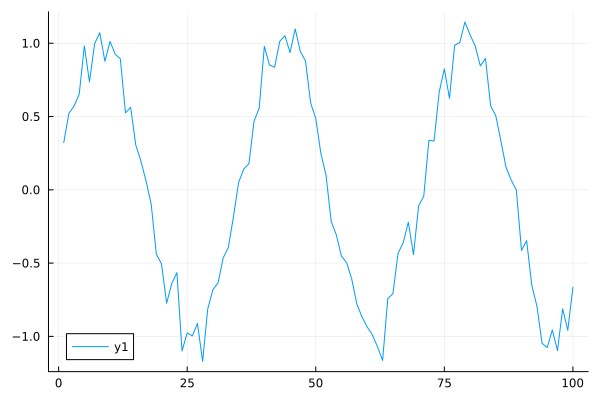

In [11]:
print(size(Final))
plot(Final[1,:])

In [12]:
mps, info, test_states = fitMPS(X_train, opts);

Generating initial weight MPS with bond dimension χ_init = 4
        using random state 1234.
Initialising train states.
Using 1 iterations per update.
Training KL Div. 10.625780258845937 | Training acc. 1.0.
Using optimiser CustomGD with the "TSGO" algorithm
Starting backward sweeep: [1/5]
Backward sweep finished.
Starting forward sweep: [1/5]
Finished sweep 1. Time for sweep: 194.75s
Training KL Div. 8.822810535859224 | Training acc. 1.0.
Using optimiser CustomGD with the "TSGO" algorithm
Starting backward sweeep: [2/5]
Backward sweep finished.
Starting forward sweep: [2/5]
Finished sweep 2. Time for sweep: 1.22s
Training KL Div. 7.6548848707953105 | Training acc. 1.0.
Using optimiser CustomGD with the "TSGO" algorithm
Starting backward sweeep: [3/5]
Backward sweep finished.
Starting forward sweep: [3/5]
Finished sweep 3. Time for sweep: 1.26s
Training KL Div. 6.976224430104296 | Training acc. 1.0.
Using optimiser CustomGD with the "TSGO" algorithm
Starting backward sweeep: [4/5]
Bac

In [13]:
class = 0
instance_idx = 10
impute_sites = [ntimepoints]
method = :median
imp = init_imputation_problem(mps,X_test);

Initialising train states.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 500 training samples and 200 testing samples.
Slicing MPS into individual states...
 - 1 class(es) were detected.
 - Time independent encoding - Legendre - detected.
 - d = 2, chi_max = 10
Re-encoding the training data to get the encoding arguments...

 Created 1 ImputationProblem struct(s) containing class-wise mps and test samples.


In [14]:
imputed_ts, pred_err, target_ts, stats, nice_plots = MPS_impute(imp, class, instance_idx, impute_sites, method; plot_fits = true);

In [15]:
pretty_table(stats[1]; header = ["Metric", "Value"], header_crayon = crayon"yellow bold", tf = tf_unicode_rounded)

╭─────────┬───────────╮
│  Metric │     Value │
├─────────┼───────────┤
│     MAE │  0.457831 │
│    MAPE │   1.25161 │
│  NN_MAE │  0.024033 │
│ NN_MAPE │ 0.0657012 │
╰─────────┴───────────╯


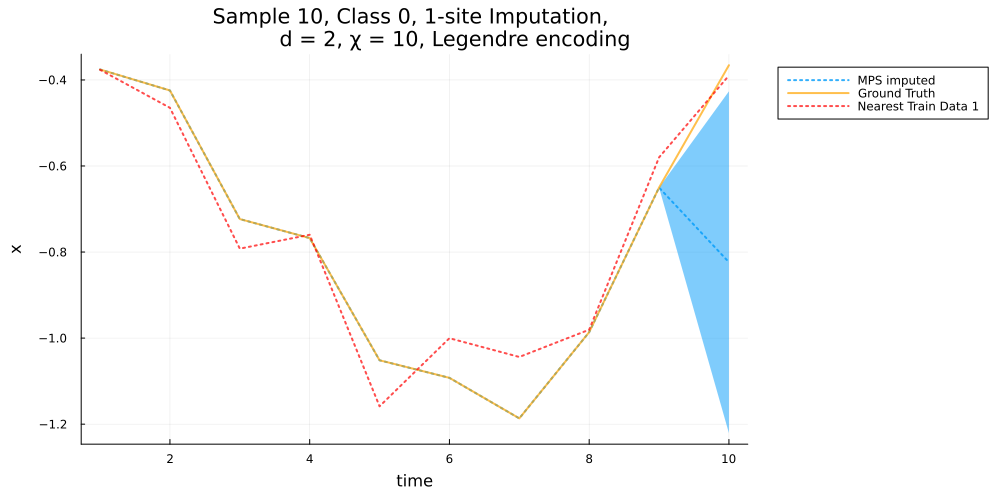

In [16]:
plot(nice_plots...)

In [32]:
num_forecasts = 100 - ntimepoints - 1

# p = plot()

initial_data = vec(Final[1,1:ntimepoints]) # Should check how this works with multiple Finals


guesses = Array{Float64, 1}(undef, num_forecasts)

current_data = reshape(initial_data, :, 1)

println("Current data size: ", size(current_data))
println("Impute sites: ", impute_sites)
println("Max impute site index: ", maximum(impute_sites))

impute_sites = filter(x -> x ≤ ntimepoints, impute_sites)

current_data = reshape(initial_data, :, 1)  # Ensure it's a column matrix


for forecast_idx in 1:1

    imp = init_imputation_problem(mps, current_data)

    imputed_ts, _, _, _, _ = MPS_impute(imp, class, instance_idx, impute_sites)
    # Nice plot of each datastep
    # plot!(forecast_idx:forecast_idx + ntimepoints - 1,data_step .+ 0.1*forecast_idx, label="", lw=1)

    print(imputed_ts)
    

end


Current data size: (10, 1)
Impute sites: [10]
Max impute site index: 10
Initialising train states.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 500 training samples and 10 testing samples.
Slicing MPS into individual states...
 - 1 class(es) were detected.
 - Time independent encoding - Legendre - detected.
 - d = 2, chi_max = 10
Re-encoding the training data to get the encoding arguments...

 Created 1 ImputationProblem struct(s) containing class-wise mps and test samples.


BoundsError: BoundsError: attempt to access 1-element Vector{Float64} at index [[10]]

In [37]:
num_forecasts = 100 - ntimepoints - 1

# Extract & reshape initial data
initial_data = vec(Final[1,1:ntimepoints])  
current_data = vec(initial_data)  # Ensure 1D vector

guesses = Array{Float64, 1}(undef, num_forecasts)

current_data = reshape(initial_data, :, 1)

println(current_data)

for forecast_idx in 1:1
    imp = init_imputation_problem(mps, current_data)

    # Debugging impute_sites
    println("Impute sites before modification: ", impute_sites)
    impute_sites = impute_sites  # Adjust indexing
    println("Impute sites after modification: ", impute_sites)

    imputed_ts, _, _, _, _ = MPS_impute(imp, class, instance_idx, impute_sites)

    print(imputed_ts)
end


[0.32216750978194997; 0.5212877947289694; 0.5720707681113808; 0.6514908767895867; 0.981340519777731; 0.7365599778174828; 0.996015754006884; 1.0723406482890152; 0.876824974909507; 1.0124945930881877;;]
Initialising train states.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 500 training samples and 10 testing samples.
Slicing MPS into individual states...
 - 1 class(es) were detected.
 - Time independent encoding - Legendre - detected.
 - d = 2, chi_max = 10
Re-encoding the training data to get the encoding arguments...

 Created 1 ImputationProblem struct(s) containing class-wise mps and test samples.
Impute sites before modification: [9]
Impute sites after modification: [9]


BoundsError: BoundsError: attempt to access 1-element Vector{Float64} at index [[9]]